In [1]:
from pprint import pprint # pretty print sometimes helps printing the data more distinguished
import time # to measure execution time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For reading and writing datasets
import csv
import json

# For clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# For plotting
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset

data_file = open("yelp_academic_dataset_business.json")
data = []
for line in data_file:
  data.append(json.loads(line))
df_business = pd.DataFrame(data)
data_file.close()
df_business.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [3]:
#let's focus on the resturants in Philadelphia and only those that are open
city = df_business[(df_business['city'] == 'Philadelphia') & (df_business['is_open'] == 1)]

santa_barbara = city[['business_id','name','address', 'categories', 'attributes','stars']]
santa_barbara

,business_id,name,address,categories,attributes,stars
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'RestaurantsDelivery': 'False', 'OutdoorSeati...",4.0
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,"Sushi Bars, Restaurants, Japanese","{'RestaurantsReservations': 'True', 'Restauran...",4.0
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,"Korean, Restaurants","{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...",4.5
35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,"Eatertainment, Arts & Entertainment, Brewpubs,...","{'OutdoorSeating': 'True', 'RestaurantsPriceRa...",3.5
82,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,"Restaurants, Automotive, Delis, Gas Stations, ...","{'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...",3.0
...,...,...,...,...,...,...
150306,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,"Restaurants, Specialty Food, Food, Sandwiches,...","{'NoiseLevel': 'u'average'', 'RestaurantsTakeO...",3.0
150326,JDM7kiCEmeBc_5W-z6eZZw,2601 Parkway Apartments,2601 Pennsylvania Ave,"Real Estate, Apartments, Home Services",{'BusinessAcceptsCreditCards': 'True'},3.0
150329,9U1Igcpe954LoWZRmNc-zg,Hand & Stone Massage And Facial Spa,"1100 S Columbus Blvd, Ste 24","Day Spas, Beauty & Spas, Skin Care, Massage","{'BusinessAcceptsCreditCards': 'True', 'Wheelc...",3.0
150334,LJ4GjQ1HL6kqvIPpNUNNaQ,Shanti Yoga and Ayurveda,"1638 Pine St, Fl 1","Health & Medical, Yoga, Shopping, Naturopathic...","{'ByAppointmentOnly': 'True', 'GoodForKids': '...",4.5


In [4]:
#we are only interested in resturants, so we only get the businesses which are resturants
#we do this by searching for the "resturant" keyword in the businesses. 

rest = santa_barbara[santa_barbara['categories'].str.contains('Restaurant.*')==True].reset_index()
rest 

,index,business_id,name,address,categories,attributes,stars
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'RestaurantsDelivery': 'False', 'OutdoorSeati...",4.0
1,15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,"Sushi Bars, Restaurants, Japanese","{'RestaurantsReservations': 'True', 'Restauran...",4.0
2,19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,"Korean, Restaurants","{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...",4.5
3,35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,"Eatertainment, Arts & Entertainment, Brewpubs,...","{'OutdoorSeating': 'True', 'RestaurantsPriceRa...",3.5
4,82,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,"Restaurants, Automotive, Delis, Gas Stations, ...","{'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...",3.0
...,...,...,...,...,...,...,...
3522,150178,auwFZzfhe2pvFw43OfsAfw,Stina Pizzeria,1705 Snyder Ave,"Pizza, Restaurants, Mediterranean","{'DogsAllowed': 'False', 'RestaurantsTakeOut':...",4.5
3523,150210,K1SsvIPfFcHniNSPc3IG7g,Flip-N-Pizza,1308 W Girard Ave,"Restaurants, American (Traditional), Chicken W...","{'WiFi': 'u'no'', 'BYOB': 'False', 'Restaurant...",4.0
3524,150237,OfRbGvHn-nAnQMqNxiIpcA,Grilly Cheese,3306 Arch St,"Specialty Food, Event Planning & Services, Res...","{'BikeParking': 'True', 'WheelchairAccessible'...",3.0
3525,150306,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,"Restaurants, Specialty Food, Food, Sandwiches,...","{'NoiseLevel': 'u'average'', 'RestaurantsTakeO...",3.0


In [5]:
# Function that extract keys from the nested dictionary
def extract_keys(attr, key):
    if attr == None:
        return "{}"
    if key in attr:
        return attr.pop(key)

# convert string to dictionary
import ast
def str_to_dict(attr):
    if attr != None:
        return ast.literal_eval(attr)
    else:
        return ast.literal_eval("{}")

In [6]:
#list of cuisines in the "resturants" category. 
#Although we filtered rows in the dataframe above by keyword "resturants", there are still a lot of unncessary categories
#so, we further filter the categories to only contain rows which have atleast one of the cusine below
#we do this so that we can efficiently provide cusisine-based recommendations

cusines_list = ["Afghan", "African","Senegalese", "Senegalese", "South African"
"American (Traditional)", 
"American (New)",
"Arabian",
"Argentine",
"Armenian",
"Asian Fusion",
"Asian",
"Australian",
"Austrian",
"Bangladeshi",
"Barbeque",
"Basque"
"Belgian",
"Brasseries",
"Brazilian",
"Breakfast & Brunch",
"Pancakes",
"British",
"Buffets",
"Bulgarian",
"Burgers",
"Burmese",
"Cafes",
"Cafeteria",
"Cajun/Creole",
"Cambodian",
"Caribbean",
"Dominican",
"Haitian",
"Puerto Rican",
"Trinidadian",
"Catalan",
'Cheesesteaks',
"Chicken Shop",
"Chicken Wings",
"Chinese",
"Cantonese",
"Dim Sum",
"Hainan",
"Shanghainese",
"Szechuan",
"Comfort Food",
"Creperies",
"Cuban",
"Czech",
"Delis",
"Diners",
"Dinner Theater",
"Eritrean",
"Ethiopian",
'Fast Food',
"Filipino",
"Fish & Chips",
"Fondue",
"Food Court",
"Food Stands",
"French",
"Mauritius",
"Reunion",
"Game Meat",
"Gastropubs",
"Georgian",
"German",
"Gluten-Free",
"Greek",
"Guamanian",
"Halal",
"Hawaiian",
"Himalayan/Nepalese",
"Honduran",
"Hong Kong Style Cafe",
"Hot Dogs",
"Hot Pot",
"Hungarian",
"Iberian",
"Indian",
"Indonesian",
"Irish",
"Italian",
"Calabrian",
"Sardinian",
"Sicilian",
"Tuscan",
"Japanese",
"Conveyor Belt Sushi",
"Izakaya",
"Japanese Curry",
"Ramen",
"Teppanyaki",
"Kebab",
"Korean",
"Kosher",
"Laotian",
"Latin American",
"Colombian",
"Salvadoran",
"Venezuelan",
"Live/Raw Food",
"Malaysian",
"Mediterranean",
"Falafel",
"Mexican",
"Tacos",
"Middle Eastern",
"Egyptian",
"Lebanese",
"Modern European",
"Mongolian",
"Moroccan",
"New Mexican Cuisine",
"Nicaraguan",
"Noodles",
"Pakistani",
"Pan Asia",
"Persian/Iranian",
"Peruvian",
"Pizza",
"Polish",
"Polynesian",
"Pop-Up Restaurants",
"Portuguese",
"Poutineries",
"Russian",
"Salad",
"Sandwiches",
"Scandinavian",
"Scottish",
"Seafood",
"Singaporean",
"Slovakian",
"Somali",
"Soul Food",
"Soup",
"Southern",
"Spanish",
'Sri Lankan',
"Steakhouses",
"Supper Clubs",
"Sushi Bars",
"Syrian",
"Taiwanese",
"Tapas Bars",
"Tapas/Small Plates",
"Tex-Mex",
"Thai",
"Turkish",
"Ukrainian",
"Uzbek",
"Vegan",
"Vegetarian",
"Vietnamese",
"Waffles",
"Wraps",
"Theme Cafes",
]

print(len(cusines_list))

157


In [7]:
df_categories_dummies = pd.Series(rest['categories']).str.get_dummies(',')
df_categories_dummies
#the purpose of this is to relax the "categories" column into columns
#where each category is a column. 1 defines presence of that category for that resturant and
#0 means absesne. We do this because we can't cluster text data. So, we have
#converted this into numerical data that can be clustered 

,Acai Bowls,Active Life,Adult,Adult Entertainment,Afghan,African,Airport Lounges,Airport Shuttles,American (New),American (Traditional),...,Trinidadian,Turkish,Uzbek,Vegan,Vegetarian,Venues & Event Spaces,Vietnamese,Wine Bars,Wineries,Wraps
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3523,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#as explained above,"categories" has a lot of non-cuisine such as "accessories","Tv" etc so
#so what I have done is created a list of cuisines and fitered 
#columns of df_categories_dummies to only keep columns are that in cuisine_list above
#this reduced the number of columns in our data from, 548 to 99

my_list = df_categories_dummies.columns.values.tolist()
for i, val in enumerate(my_list):
  if val not in cusines_list:
    df_categories_dummies = df_categories_dummies.drop(val, 1)

df_categories_dummies

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


,African,American (New),Asian Fusion,Barbeque,Brazilian,Breakfast & Brunch,British,Buffets,Burgers,Cafes,...,Tapas/Small Plates,Tex-Mex,Thai,Trinidadian,Turkish,Uzbek,Vegan,Vegetarian,Vietnamese,Wraps
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
result = rest[['name','stars']]
result

,name,stars
0,St Honore Pastries,4.0
1,Tuna Bar,4.0
2,BAP,4.5
3,Craft Hall,3.5
4,Wawa,3.0
...,...,...
3522,Stina Pizzeria,4.5
3523,Flip-N-Pizza,4.0
3524,Grilly Cheese,3.0
3525,PrimoHoagies,3.0


In [10]:
# Concat all tables 
df_final = pd.concat([df_categories_dummies, result], axis=1)

#now, because we dropped cateogies that did not belong to cusine_list, some rows in the df_final table
#will have 0's for all cuisine columns 
#so we want to remove these.
#objective is to only keep those rows that have atleast one 1 in 
#any one of the cuisine columns. Otherwise, we discard that row 

df_final['Filter'] = False
for index, row in df_final.iterrows():
  a = row.values.tolist()
  if len(set(a[:-3])) != 1:
    df_final.at[index, 'Filter'] = True 

df_final = df_final[df_final['Filter'] == True]
df_final.shape

#we have now reduced to 1508 rows

(1508, 102)

In [11]:
df_final
df_final.drop("Filter", 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,African,American (New),Asian Fusion,Barbeque,Brazilian,Breakfast & Brunch,British,Buffets,Burgers,Cafes,...,Thai,Trinidadian,Turkish,Uzbek,Vegan,Vegetarian,Vietnamese,Wraps,name,stars
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Tuna Bar,4.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,BAP,4.5
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,Wendy's,1.5
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Federal Donuts,4.5
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Jong Ka Jib,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Friday Saturday Sunday,4.5
3516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,Can Tho City,4.0
3520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Luigi’s Pizza Fresca,4.0
3521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Spuntino Wood Fired Pizza,4.5


In [12]:
#we still have a lot of columns of cuisine categories
#clustering performs better with fewer columns 
#so I have used PCA to reduce the number of columns 
#note: I am only applying PCA to the compressed cuisine cateogires

apply_pca = df_final.drop(['name', 'stars'], axis = 1)
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(apply_pca)
category_vectors_pca = pca.transform(apply_pca)
category_vectors_pca.shape

#apply_pca has the same number of rows as the df_final
#we have compressed the number of columns/dimensions
#data is now ready to feed to k-means

(1508, 15)

In [13]:
# map floating point stars to an integer
"""mapper = {1.0:1,1.5:2, 2.0:2, 2.5:3, 3.0:3, 3.5:4, 4.0:4, 4.5:5, 5.0:5}
df_final['stars'] = df_final['stars'].map(mapper)
print(df_final.columns.tolist())"""

"mapper = {1.0:1,1.5:2, 2.0:2, 2.5:3, 3.0:3, 3.5:4, 4.0:4, 4.5:5, 5.0:5}\ndf_final['stars'] = df_final['stars'].map(mapper)\nprint(df_final.columns.tolist())"

In [14]:
"""X = df_final.drop('name', 1)
X_train = X.iloc[:400,:]
X_test = X.iloc[400:,:]"""

#split category_vectors_pca. Train model on 1506 rows and test model on the rest
X_train = category_vectors_pca[:1506,:]
X_test = category_vectors_pca[1506:,:]

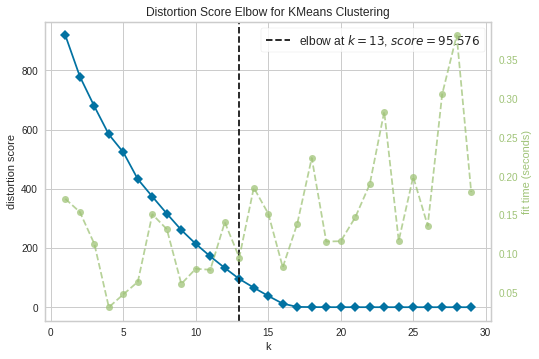

In [15]:
# choosing the optimal number of clusters to use for our modelm
#elbow method 
from sklearn.cluster import KMeans
import numpy as np
from yellowbrick.cluster import KElbowVisualizer

X_array = np.array(X_train)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,30))

visualizer.fit(X_array)        # Fit the data to the visualizer
visualizer.show()

#optimal number of clusters is k=12, Therefore, I will train model based on that

In [16]:
from sklearn.cluster import KMeans
import numpy as np

#train k-means on the data (on which we applied PCA)
kmeans = KMeans(n_clusters=13, random_state=0, init='k-means++').fit(X_array)

In [17]:
prdictions = kmeans.predict(X_test)
prdictions

#eblow are the labels predicted for our t_test
kmeans.labels_

array([ 0,  0, 12, ...,  7,  0,  8], dtype=int32)

In [18]:
#cluster assignment 
#creates a dictionary where for each label (in X_train), we have the indices of all the rows in df_final that belong to that cluster
from collections import defaultdict

cluster_dict = defaultdict(list)
for i, val in enumerate(kmeans.labels_):
  cluster_dict[val].append(i) #storing indices

In [19]:
#retrive all the resturants that belong to the cluster assignned to test data

#the first label we have in predictions is for resturant indexed 1506
#the label predicted for this resturant is 0

#let us pretend that the user liked the resturant below (it's from X_test which means model has not seen it yet)

a = rest.loc[rest['name'] == "Luigi’s Pizza Fresca"]
a_ = a['categories'].values.tolist()
a_list = a_[0].split(",")
cuisine_list = []
for i in a_list:
  cuisine_list.append(i.strip())
  

print(cuisine_list)
#below we can see that the 121th resturant contains the following categories. 
#Now, let us see if our model correctly clusters and recommends related resturants

['Italian', 'Pizza', 'Restaurants', 'Hawaiian']


In [22]:
#return all the resturants in cluster 0 as recommendations for the resturant above
#we are basically returning resturants in the same cluster as the test resturant as recommendations
#for the test resturant 

#k-means predicted cluster 0 for the above resturant 
#so we will return all resturants in clutser 0 as recommendations if user liked this resturant
list_result = []
results = cluster_dict[0]
for i in results:
  name = df_final.iloc[i]['name']
  a = rest.loc[rest['name'] == name]
  a = a['categories'].values.tolist()
  a_list_ = a[0].split(",")
  cuisine_list_ = []
  for i in a_list_:
    cuisine_list_.append(i.strip())
  c = 0
  for i in range(len(cuisine_list)):
    if cuisine_list[i] in cuisine_list_:
      c+=1
  if c > 1:
    list_result.append([name,cuisine_list_, c])


list_final = sorted(list_result, key=lambda x:x[2], reverse=True)
print("Below are the recommendations:")
for i in range(10):
  print(list_final[i][0], ", Cuisines: ", list_final[i][1])

#below are the top 10 results for our resturant. As we can see, most of them are italian resturants 
#so we have provided some good recommendations for our italian resturant!  

Below are the recommendations:
Lincoln Chicken Pizza And Grill , Cuisines:  ['Cheesesteaks', 'Chicken Wings', 'Restaurants', 'Pizza']
Larry's Steaks , Cuisines:  ['Cheesesteaks', 'Sandwiches', 'Pizza', 'Restaurants', 'Delis']
Richie's , Cuisines:  ['Food Stands', 'Restaurants', 'Sandwiches', 'Pizza', 'Burgers', 'Breakfast & Brunch', 'Delis', 'Food', 'Coffee & Tea']
Pizzeria Vetri , Cuisines:  ['Italian', 'Pizza', 'Restaurants', 'Salad']
20th Street Pizza , Cuisines:  ['Vegan', 'Restaurants', 'Pizza']
City View Pizza , Cuisines:  ['Cheesesteaks', 'Sandwiches', 'Restaurants', 'Pizza']
Prince Of Pizza & Falafel , Cuisines:  ['Mediterranean', 'Restaurants', 'Pizza', 'Falafel', 'Cheesesteaks', 'Chicken Wings']
Peace A Pie , Cuisines:  ['Salad', 'Pizza', 'Desserts', 'Restaurants', 'Food']
Bruno's Pizza , Cuisines:  ['Cheesesteaks', 'Restaurants', 'Pizza']
Liberty Choice , Cuisines:  ['Mediterranean', 'Specialty Food', 'Pizza', 'Food', 'Convenience Stores', 'Falafel', 'Restaurants', 'Ethnic F

In [23]:
a = rest.loc[rest['name'] == "Spuntino Wood Fired Pizza"]
a_ = a['categories'].values.tolist()
a_list = a_[0].split(",")
cuisine_list = []
for i in a_list:
  cuisine_list.append(i.strip())
  

print(cuisine_list)

['Pizza', 'Restaurants']


In [24]:
list_result = []
results = cluster_dict[0]
for i in results:
  name = df_final.iloc[i]['name']
  a = rest.loc[rest['name'] == name]
  a = a['categories'].values.tolist()
  a_list_ = a[0].split(",")
  cuisine_list_ = []
  for i in a_list_:
    cuisine_list_.append(i.strip())
  c = 0
  for i in range(len(cuisine_list)):
    if cuisine_list[i] in cuisine_list_:
      c+=1
  if c > 1:
    list_result.append([name,cuisine_list_, c])


list_final = sorted(list_result, key=lambda x:x[2], reverse=True)
print("Below are the recommendations:")
for i in range(10):
  print(list_final[i][0], ", Cuisines: ", list_final[i][1])


Below are the recommendations:
Lincoln Chicken Pizza And Grill , Cuisines:  ['Cheesesteaks', 'Chicken Wings', 'Restaurants', 'Pizza']
Larry's Steaks , Cuisines:  ['Cheesesteaks', 'Sandwiches', 'Pizza', 'Restaurants', 'Delis']
Richie's , Cuisines:  ['Food Stands', 'Restaurants', 'Sandwiches', 'Pizza', 'Burgers', 'Breakfast & Brunch', 'Delis', 'Food', 'Coffee & Tea']
Pizzeria Vetri , Cuisines:  ['Italian', 'Pizza', 'Restaurants', 'Salad']
20th Street Pizza , Cuisines:  ['Vegan', 'Restaurants', 'Pizza']
City View Pizza , Cuisines:  ['Cheesesteaks', 'Sandwiches', 'Restaurants', 'Pizza']
Prince Of Pizza & Falafel , Cuisines:  ['Mediterranean', 'Restaurants', 'Pizza', 'Falafel', 'Cheesesteaks', 'Chicken Wings']
Peace A Pie , Cuisines:  ['Salad', 'Pizza', 'Desserts', 'Restaurants', 'Food']
Bruno's Pizza , Cuisines:  ['Cheesesteaks', 'Restaurants', 'Pizza']
Liberty Choice , Cuisines:  ['Mediterranean', 'Specialty Food', 'Pizza', 'Food', 'Convenience Stores', 'Falafel', 'Restaurants', 'Ethnic F

In [25]:
a = rest.loc[rest['name'] == "Stina Pizzeria"]
a_ = a['categories'].values.tolist()
a_list = a_[0].split(",")
cuisine_list = []
for i in a_list:
  cuisine_list.append(i.strip())
  

print(cuisine_list)

['Pizza', 'Restaurants', 'Mediterranean']


In [26]:
list_result = []
results = cluster_dict[0]
for i in results:
  name = df_final.iloc[i]['name']
  a = rest.loc[rest['name'] == name]
  a = a['categories'].values.tolist()
  a_list_ = a[0].split(",")
  cuisine_list_ = []
  for i in a_list_:
    cuisine_list_.append(i.strip())
  c = 0
  for i in range(len(cuisine_list)):
    if cuisine_list[i] in cuisine_list_:
      c+=1
  if c > 1:
    list_result.append([name,cuisine_list_, c])


list_final = sorted(list_result, key=lambda x:x[2], reverse=True)
print("Below are the recommendations:")
for i in range(10):
  print(list_final[i][0], ", Cuisines: ", list_final[i][1])

#below we have found simsilar resturants that contain both pizza and Mediterranean food!

Below are the recommendations:
Prince Of Pizza & Falafel , Cuisines:  ['Mediterranean', 'Restaurants', 'Pizza', 'Falafel', 'Cheesesteaks', 'Chicken Wings']
Liberty Choice , Cuisines:  ['Mediterranean', 'Specialty Food', 'Pizza', 'Food', 'Convenience Stores', 'Falafel', 'Restaurants', 'Ethnic Food']
Barbuzzo , Cuisines:  ['Mediterranean', 'Restaurants', 'Pizza', 'Italian']
Lincoln Chicken Pizza And Grill , Cuisines:  ['Cheesesteaks', 'Chicken Wings', 'Restaurants', 'Pizza']
Goldie , Cuisines:  ['Mediterranean', 'Falafel', 'Restaurants', 'Fast Food']
Larry's Steaks , Cuisines:  ['Cheesesteaks', 'Sandwiches', 'Pizza', 'Restaurants', 'Delis']
Richie's , Cuisines:  ['Food Stands', 'Restaurants', 'Sandwiches', 'Pizza', 'Burgers', 'Breakfast & Brunch', 'Delis', 'Food', 'Coffee & Tea']
Sahara Grill , Cuisines:  ['Mediterranean', 'Middle Eastern', 'Restaurants']
Pita Chip , Cuisines:  ['Mediterranean', 'Vegetarian', 'Sandwiches', 'Wraps', 'Halal', 'Restaurants']
Yeeroh , Cuisines:  ['Greek', 'R

In [27]:
#let's judge how good the clustering model is

from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(X_array, kmeans.labels_)
print(db_index)

#a low value means clustering is good. Here, we get a value of 0.34 which is pretty good!

0.21963393938137202


In [28]:
from sklearn.metrics import silhouette_score

s_C = silhouette_score(X_array, kmeans.labels_, metric='euclidean')
print(s_C)

#closer to score is to 1, the better

0.8738487505619392


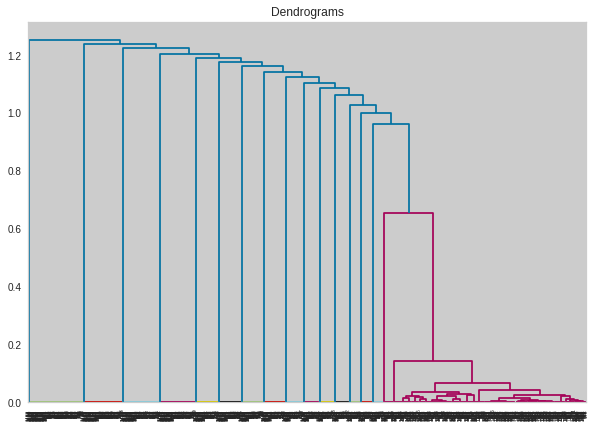

In [29]:
#to determine the optimal number of clusters, we visulize a dendogram
#and then visually decide which distance to cut the dendogram at to produce clusters. 
#below the dendogram is hard to read and hence, we can't decide on a distance thersold
#on where to cut. Therefore, we use the DB index to get an idea of the optimal number of clusters

import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_array, method='average'))

In [35]:
#both use euclidean distance as a measure.
#how to determine optimal number of clusters? For that we could need 
#a distance measure to cut the dendogram. But we do not have this distance information
#so providing 
from sklearn.cluster import AgglomerativeClustering

In [36]:
#outputting DB for diffrent no. of clusters
#using average link as merging measure as lecture slides said that it is most commonly used.

for i in range(6,20):
  clustering_1 = AgglomerativeClustering(n_clusters=i, linkage='average').fit(X_array)
  db_index = davies_bouldin_score(X_array, clustering_1.labels_)
  s_C = silhouette_score(X_array, clustering_1.labels_, metric='euclidean')
  print(i, db_index, s_C)
#optimal number between 11 and 14 because after that we get into the problem of one point per cluster kind of thing
#since we picked 12 clusters for k-means, let's evaluate AC for 12 clusters.
#for 12 clusters, boih k-means and AC have similar DB index and SC. Hnece both methods are comparable for thay many clusters


6 0.5084990835679241 0.5835117865027895
7 0.47613727076240514 0.6304996979917084
8 0.4388857563405642 0.6776570280668769
9 0.3961834501109047 0.7243414106591379
10 0.35531834810007007 0.7648393308731074
11 0.3137285122390946 0.8023191195120825
12 0.2692443003197134 0.8383868377544482
13 0.21963393938137202 0.8738487505619392
14 0.17891596466257173 0.9024111799012016
15 0.13355119201374627 0.9319496803970861
16 0.08002835589903445 0.9612229500394739
17 0.042285104159667124 0.9718553847662895
18 0.05816452015312038 0.8859452580535992
19 0.08486992269982734 0.8800103823476447


In [37]:
clustering = AgglomerativeClustering(n_clusters=13, linkage='average').fit(X_array)
#cluster assignment 
#creates a dictionary where for each label (in X_train), we have the indices of all the rows in df_final that belong to that cluster
from collections import defaultdict

cluster_dict = defaultdict(list)
for i, val in enumerate(clustering.labels_):
  cluster_dict[val].append(i) #storing indices

In [38]:
a = rest.loc[rest['name'] == "Luigi’s Pizza Fresca"]
a_ = a['categories'].values.tolist()
a_list = a_[0].split(",")
cuisine_list = []
for i in a_list:
  cuisine_list.append(i.strip())
  

print(cuisine_list)

['Italian', 'Pizza', 'Restaurants', 'Hawaiian']


In [39]:
list_result = []
results = cluster_dict[0]
for i in results:
  name = df_final.iloc[i]['name']
  a = rest.loc[rest['name'] == name]
  a = a['categories'].values.tolist()
  a_list_ = a[0].split(",")
  cuisine_list_ = []
  for i in a_list_:
    cuisine_list_.append(i.strip())
  c = 0
  for i in range(len(cuisine_list)):
    if cuisine_list[i] in cuisine_list_:
      c+=1
  if c > 1:
    list_result.append([name,cuisine_list_, c])


list_final = sorted(list_result, key=lambda x:x[2], reverse=True)
print("Below are the recommendations:")
for i in range(10):
  print(list_final[i][0], ", Cuisines: ", list_final[i][1])


Below are the recommendations:
Pizzeria Vetri , Cuisines:  ['Italian', 'Pizza', 'Restaurants', 'Salad']
Barbuzzo , Cuisines:  ['Mediterranean', 'Restaurants', 'Pizza', 'Italian']
LaScala's Pronto , Cuisines:  ['Salad', 'Italian', 'Pizza', 'Restaurants']
Fiesta Pizza , Cuisines:  ['Greek', 'Restaurants', 'Pizza', 'Sandwiches', 'Italian']
Brazilian Pizza Philly , Cuisines:  ['Brazilian', 'Restaurants', 'Italian', 'Pizza']
Lincoln Chicken Pizza And Grill , Cuisines:  ['Cheesesteaks', 'Chicken Wings', 'Restaurants', 'Pizza']
Larry's Steaks , Cuisines:  ['Cheesesteaks', 'Sandwiches', 'Pizza', 'Restaurants', 'Delis']
Richie's , Cuisines:  ['Food Stands', 'Restaurants', 'Sandwiches', 'Pizza', 'Burgers', 'Breakfast & Brunch', 'Delis', 'Food', 'Coffee & Tea']
20th Street Pizza , Cuisines:  ['Vegan', 'Restaurants', 'Pizza']
City View Pizza , Cuisines:  ['Cheesesteaks', 'Sandwiches', 'Restaurants', 'Pizza']


In [40]:
a = rest.loc[rest['name'] == "Spuntino Wood Fired Pizza"]
a_ = a['categories'].values.tolist()
a_list = a_[0].split(",")
cuisine_list = []
for i in a_list:
  cuisine_list.append(i.strip())
  

print(cuisine_list)

['Pizza', 'Restaurants']


In [41]:
list_result = []
results = cluster_dict[0]
for i in results:
  name = df_final.iloc[i]['name']
  a = rest.loc[rest['name'] == name]
  a = a['categories'].values.tolist()
  a_list_ = a[0].split(",")
  cuisine_list_ = []
  for i in a_list_:
    cuisine_list_.append(i.strip())
  c = 0
  for i in range(len(cuisine_list)):
    if cuisine_list[i] in cuisine_list_:
      c+=1
  if c > 1:
    list_result.append([name,cuisine_list_, c])


list_final = sorted(list_result, key=lambda x:x[2], reverse=True)
print("Below are the recommendations:")
for i in range(10):
  print(list_final[i][0], ", Cuisines: ", list_final[i][1])

Below are the recommendations:
Lincoln Chicken Pizza And Grill , Cuisines:  ['Cheesesteaks', 'Chicken Wings', 'Restaurants', 'Pizza']
Larry's Steaks , Cuisines:  ['Cheesesteaks', 'Sandwiches', 'Pizza', 'Restaurants', 'Delis']
Richie's , Cuisines:  ['Food Stands', 'Restaurants', 'Sandwiches', 'Pizza', 'Burgers', 'Breakfast & Brunch', 'Delis', 'Food', 'Coffee & Tea']
Pizzeria Vetri , Cuisines:  ['Italian', 'Pizza', 'Restaurants', 'Salad']
20th Street Pizza , Cuisines:  ['Vegan', 'Restaurants', 'Pizza']
City View Pizza , Cuisines:  ['Cheesesteaks', 'Sandwiches', 'Restaurants', 'Pizza']
Prince Of Pizza & Falafel , Cuisines:  ['Mediterranean', 'Restaurants', 'Pizza', 'Falafel', 'Cheesesteaks', 'Chicken Wings']
Peace A Pie , Cuisines:  ['Salad', 'Pizza', 'Desserts', 'Restaurants', 'Food']
Bruno's Pizza , Cuisines:  ['Cheesesteaks', 'Restaurants', 'Pizza']
Liberty Choice , Cuisines:  ['Mediterranean', 'Specialty Food', 'Pizza', 'Food', 'Convenience Stores', 'Falafel', 'Restaurants', 'Ethnic F

In [42]:
a = rest.loc[rest['name'] == "Stina Pizzeria"]
a_ = a['categories'].values.tolist()
a_list = a_[0].split(",")
cuisine_list = []
for i in a_list:
  cuisine_list.append(i.strip())
  

print(cuisine_list)

['Pizza', 'Restaurants', 'Mediterranean']


In [43]:
list_result = []
results = cluster_dict[0]
for i in results:
  name = df_final.iloc[i]['name']
  a = rest.loc[rest['name'] == name]
  a = a['categories'].values.tolist()
  a_list_ = a[0].split(",")
  cuisine_list_ = []
  for i in a_list_:
    cuisine_list_.append(i.strip())
  c = 0
  for i in range(len(cuisine_list)):
    if cuisine_list[i] in cuisine_list_:
      c+=1
  if c > 1:
    list_result.append([name,cuisine_list_, c])


list_final = sorted(list_result, key=lambda x:x[2], reverse=True)
print("Below are the recommendations:")
for i in range(10):
  print(list_final[i][0], ", Cuisines: ", list_final[i][1])

Below are the recommendations:
Prince Of Pizza & Falafel , Cuisines:  ['Mediterranean', 'Restaurants', 'Pizza', 'Falafel', 'Cheesesteaks', 'Chicken Wings']
Liberty Choice , Cuisines:  ['Mediterranean', 'Specialty Food', 'Pizza', 'Food', 'Convenience Stores', 'Falafel', 'Restaurants', 'Ethnic Food']
Barbuzzo , Cuisines:  ['Mediterranean', 'Restaurants', 'Pizza', 'Italian']
Lincoln Chicken Pizza And Grill , Cuisines:  ['Cheesesteaks', 'Chicken Wings', 'Restaurants', 'Pizza']
Goldie , Cuisines:  ['Mediterranean', 'Falafel', 'Restaurants', 'Fast Food']
Larry's Steaks , Cuisines:  ['Cheesesteaks', 'Sandwiches', 'Pizza', 'Restaurants', 'Delis']
Richie's , Cuisines:  ['Food Stands', 'Restaurants', 'Sandwiches', 'Pizza', 'Burgers', 'Breakfast & Brunch', 'Delis', 'Food', 'Coffee & Tea']
Sahara Grill , Cuisines:  ['Mediterranean', 'Middle Eastern', 'Restaurants']
Pita Chip , Cuisines:  ['Mediterranean', 'Vegetarian', 'Sandwiches', 'Wraps', 'Halal', 'Restaurants']
Yeeroh , Cuisines:  ['Greek', 'R